Installing and importing Dependencies


In [1]:
# !pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [2]:
# !git clone https://github.com/ultralytics/yolov5

In [3]:
# !cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\ankit\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\ankit/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-25 Python-3.10.8 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Make Detections

In [7]:
img = 'https://thumbs.dreamstime.com/b/busy-indian-street-traffic-people-lots-vehicles-daytime-picture-taken-flyover-171209185.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 900x675 11 persons, 14 cars, 1 motorcycle, 2 buss, 7 trucks, 1 suitcase
Speed: 1142.1ms pre-process, 179.4ms inference, 116.5ms NMS per image at shape (1, 3, 640, 480)


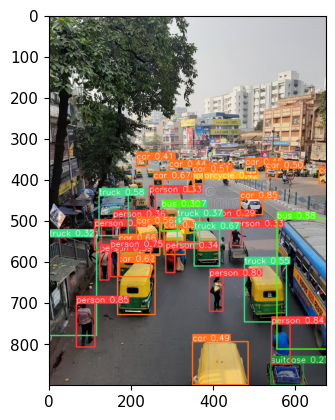

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.xyxy #xmin, ymin, xmax,ymax,confidence , class

[tensor([[5.53812e+02, 4.96264e+02, 6.75000e+02, 8.12718e+02, 8.77005e-01, 5.00000e+00],
         [6.63764e+01, 7.02000e+02, 1.11696e+02, 8.07622e+02, 8.51790e-01, 0.00000e+00],
         [4.64541e+02, 4.46543e+02, 5.18087e+02, 4.85795e+02, 8.45348e-01, 2.00000e+00],
         [5.40356e+02, 7.51297e+02, 5.85956e+02, 8.48107e+02, 8.44851e-01, 0.00000e+00],
         [3.89415e+02, 6.35482e+02, 4.22920e+02, 7.20435e+02, 8.00636e-01, 0.00000e+00],
         [1.49849e+02, 5.65595e+02, 1.71205e+02, 6.36219e+02, 7.51170e-01, 0.00000e+00],
         [2.53319e+02, 3.99000e+02, 2.76154e+02, 4.24648e+02, 6.67571e-01, 2.00000e+00],
         [3.52590e+02, 5.21680e+02, 4.14378e+02, 6.10402e+02, 6.66069e-01, 7.00000e+00],
         [1.69782e+02, 5.50673e+02, 2.46572e+02, 6.36671e+02, 6.55565e-01, 2.00000e+00],
         [1.66858e+02, 6.01700e+02, 2.57560e+02, 7.28912e+02, 6.17841e-01, 2.00000e+00],
         [1.21216e+02, 4.39671e+02, 1.92710e+02, 5.36976e+02, 5.75932e-01, 7.00000e+00],
         [2.12849e+02

In [11]:
# results.show() # shows pictures
np.squeeze(results.render()).shape

(900, 675, 3)

## Real Time Detection

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # make detection
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Train from scratch

In [13]:
import uuid  #unique identifire
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake','drowsy']
number_imgs = 50

In [ ]:
cap = cv2.VideoCapture(0)
#loop through labels
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)
    #loop through img range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        #webcam feed
        ret, frame = cap.read()
        
        #naming the image and path
        imagename = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        #image to file conversion
        cv2.imwrite(imagename,frame)
        
        #Display to screen
        cv2.imshow('Image Collection',frame)
        time.sleep(5)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
        
        
        
        

In [20]:
for label in labels:
    print("Collecting images for {}".format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imagename = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imagename)

data\images\awake.c61d09a1-9e51-11ed-aee7-900f0ca2aaae.jpg
data\images\awake.c61d09a2-9e51-11ed-b8fb-900f0ca2aaae.jpg
data\images\awake.c61d31ec-9e51-11ed-8235-900f0ca2aaae.jpg
data\images\awake.c61d31ed-9e51-11ed-8c9b-900f0ca2aaae.jpg
data\images\awake.c61d31ee-9e51-11ed-8de7-900f0ca2aaae.jpg
data\images\awake.c61d31ef-9e51-11ed-b0a3-900f0ca2aaae.jpg
data\images\awake.c61d31f0-9e51-11ed-9081-900f0ca2aaae.jpg
data\images\awake.c61d31f1-9e51-11ed-9268-900f0ca2aaae.jpg
data\images\awake.c61d31f2-9e51-11ed-a1aa-900f0ca2aaae.jpg
data\images\awake.c61d31f3-9e51-11ed-8c2c-900f0ca2aaae.jpg
data\images\awake.c61d31f4-9e51-11ed-a371-900f0ca2aaae.jpg
data\images\awake.c61d31f5-9e51-11ed-9caa-900f0ca2aaae.jpg
data\images\awake.c61d31f6-9e51-11ed-8668-900f0ca2aaae.jpg
data\images\awake.c61d31f7-9e51-11ed-bd3b-900f0ca2aaae.jpg
data\images\awake.c61d31f8-9e51-11ed-8d69-900f0ca2aaae.jpg
data\images\awake.c61d31f9-9e51-11ed-a193-900f0ca2aaae.jpg
data\images\awake.c61d31fa-9e51-11ed-89ac-900f0ca2aaae.j